# **<center>Practical Implementation </center>**


## <center> Programming Session 2 - LSTM Based Classification Model </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/Practical-Implementations-ENPC/">
    <img src="https://drive.google.com/uc?export=view&id=12t-JTO4co2ZDxqdmNOOZG104izf5bSye" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/18rbyPk4ixHwTiU7HdLr7pAEqR-6bxZWY?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>




The Objective of this session is to create an LSTM based model for news classification.


The dataset is the BBC news articles (Source: [here](http://mlg.ucd.ie/files/publications/greene06icml.pdf))


Each Text is associated with one of the following categories:

* tech
* business
* sport
* entertainment
* politics

In [ ]:
# Import basic libraries
import matplotlib.pyplot as plt # for plotting
import numpy as np # for manipulating arrays
import tensorflow as tf # for creating Neural Networks, we will use it to load data
import os
import pandas as pd
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

# 1. Preprocessing the Data

The objective of this session is to load the data and preprocess it into a `(N, T)` tensor:

* `N` is the number of samples.
* `T` is the length of the sequences.

All the sequences should be of the same length.

* First, we need to decide what should be the length `T` (another hyperparameter)
* Then, for each sequence:
  * If it's shorter than `T`, the sequence is padded with zeros.
  * If it's longer than `T`, the sequence is truncated.  


<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1GLwOZWrMiprZpN8jijTkLO_GVpgmi9MM"></center>

You can find the data in the following [link](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data). You can then store the file `train.csv` in a directory called `data`.

The dataset can be found in the folder `data`. The csv file is named `bbc-text.csv`

You will find the following columns:

* `text` contains the news.

* `category` is an element of the following categories:
  * tech
  * business
  * sport
  * entertainment
  * politics




---
<font color=green>Q1:</font>
<br><font color='green'>
Load the dataframe and call the dataframe `df` and store the elements in the column `text` in a list called `texts`
</font>

---

In [ ]:
url='https://drive.google.com/uc?id=1KPTV36AVXboK2v9oECJUu06U1PTugc_k'
df = pd.read_csv(url)

In [ ]:
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


The following function is used for cleaning the texts:

In [ ]:
# Import library
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean(texts):
  clean_texts = []
  for sequence in texts:
    # Get the tokens
    words = sequence.split()
    # Keep only the words
    alphabetic_only = [word for word in words if word.isalpha()]
    # All tokens should be written in lowercase
    lower_case_only = [word.lower() for word in alphabetic_only]
    # Select the stop words from nltk
    stopwords_nltk = set(stopwords.words('english'))
    # Delete the stop words
    cleaned_words = [word for word in lower_case_only if word not in stopwords_nltk]
    # Transform the list of tokens into a long string
    clean_sequence = ' '.join(cleaned_words)
    # Save the result in the list clean_texts
    clean_texts.append(clean_sequence)
  return clean_texts

---
<font color=green>Q2:</font>
<br><font color='green'>
Replace the column `text` with processed texts using the `clean()` function. The new column should be named `text`.
</font>

---

In [ ]:
# Replace the column text with the processed version of it


---
<font color=green>Q3:</font>
<br><font color='green'>
Replace the categories in the column `category` of the dataframe `df` with the corresponding indices in the following table:
</font>

---




| **category**  | **index** |
|---------------|-----------|
| tech          | 0         |
| business      | 1         |
| sport         | 2         |
| entertainment | 3         |
| politics      | 4         |




In [ ]:
# List of labels


['tech', 'business', 'sport', 'entertainment', 'politics']

---
<font color=green>Q4:</font>
<br><font color='green'>
Define a list, called `labels` containing the targets associated with each text in the column `text`.
</font>

---

In [ ]:
# List of possible labels


---
<font color=green>Q5:</font>
<br><font color='green'>
Preprocess the texts in the column `text` and transform them into sequences of integers:

* Use `Tokenizer` from `tensorflow.keras.preprocessing.text` to create your tokenizer
* Create your word_index dictionary
* Transform your texts into sequences of integers via your word_index dictionary.
</font>

---

Found 26149 unique tokens.


---
<font color=green>Q6:</font>
<br><font color='green'>
Using `pad_sequences` from `tensorflow.keras.preprocessing.sequence`, transform the list of sequences into an $(N, T)$ tensor called `data`. (Set `T = 300`)
</font>

---

---
<font color=green>Q7:</font>
<br><font color='green'>
Shuffle the rows of the $(N, T)$ tensor `data`. Then, Split the data into training data (80% of data) and test data. Finally, use the one hot encoding process to transform the targets into $(N_1, K)$ and $(N_2, K)$ tensors (where $N_1$ is the size of the training data, $N_2$ the size of the test data and $K$ the number of possible categories.  
</font>

---

Shape of data tensor: (2225, 300)


# 2. Creating the Embedding Matrix

## 2.1 Creating the Embedding index dictionary

The objective of this section is to load a pretrained embedding matrix

We introduced the **Word2vec** algorithm in the coursework.

Let us use the **Glove** pre-trained vectors for this session.

Its developers have made available precomputed embeddings for millions of English tokens, trained on different corpora like the Wikipedia corpus.

For more informations, see the link [here](https://nlp.stanford.edu/projects/glove)

Q5.



---
<font color=green>Q8:</font>
<br><font color='green'>
Run the following code to download the precomputed embeddings from 2014 English Wikipedia. It’s an 822 MB zip file called glove.6B.zip, containing different D-dimensional embedding vectors for 400,000 words (or nonword tokens). Unzip it and store in the folder named `glove.6B`.
</font>

---

In [ ]:
# Download the zip file
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-10-23 09:37:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-10-23 09:37:47--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-10-23 09:37:47--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Unzip it and put the files in the destination folder `glove.6B`
!unzip glove*.zip -d glove.6B

Archive:  glove.6B.zip
  inflating: glove.6B/glove.6B.50d.txt  
  inflating: glove.6B/glove.6B.100d.txt  
  inflating: glove.6B/glove.6B.200d.txt  
  inflating: glove.6B/glove.6B.300d.txt  


---
<font color=green>Q9:</font>
<br><font color='green'>
Create a dictionary called `embedding_index` that maps each word to a vector of size 200 as shown in the following figure:
</font>

---

<center><img width=“1000" src = "https://drive.google.com/uc?export=view&id=1fUAxpg7IU-bYQgntkV6YghOCqTVGwSt1"></center>

In [ ]:
# Directory of the Embedding file
dir_glove = os.path.join(os.getcwd(),'glove.6B')

# Create the dictionary
embedding_index = {}

f = open(os.path.join(dir_glove, "glove.6B.200d.txt"), encoding = "utf8")
for line in f:
    # Split each line
    values = line.split()
    # Get the word
    word = values[0]
    # Get the embedding vector
    embedding_vector = np.asarray(values[1:], dtype = "float32")
    # Append the dictionary
    embedding_index[word] = embedding_vector
f.close()

In [ ]:
len(embedding_index)

400000

## 2.2. Creating the Embedding matrix

---
<font color=green>Q10:</font>
<br><font color='green'>
Create a matrix called `embedding_matrix` of shape `(V, D)` where `D` is the embedding dimension and `V` the vocabulary size.
* In this matrix, the row number k will be represented by the embedding vector associated with the word of index k in the `embedding_index` dictionary.
* If the word of index k is not in the `embedding_index` dictionary, we represent it by a vector of zeros in the embedding matrix.
</font>

---

<center><img width=“300" src = "https://drive.google.com/uc?export=view&id=1KM1n5qSajHkf4ItxycCddcjq2MhkSS8e"></center>

# 3. Creating the Model

## 3.1 Using pre-trained word vectors (embedding_matrix) from GloVe

---
<font color=green>Q11:</font>
<br><font color='green'>
Using `Embedding` from `tensorflow.keras.layers`, create the embedding layer called `embedding_layer`

* This layer transforms an `(N, T)` tensor of integers into an `(N, T, D)` tensor.
* Load the `embedding_matrix` into the `embedding_layer`
</font>

---

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1EdfK87ayAWSEXfr-A60JbXxBuXqd-QL0"></center>

In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
  V,
  D,
  weights=[embedding_matrix],
  input_length=T,
  trainable=False
)

---
<font color=green>Q12:</font>
<br><font color='green'>
Create the following model:
</font>

---

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1ybUjIhriRWlMeTtn2NBiMzPXIQuTRZY3"></center>

Model: "model"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_1 (InputLayer)                        [(None, 300)]                           0              
                                                                                                    
 Embedding_layer (Embedding)                 (None, 300, 200)                        2000000        
                                                                                                    
 LSTM_1_layer (LSTM)                         (None, 300, 32)                         29824          
                                                                                                    
 LSTM_2_layer (LSTM)                         (None, 32)                              8320           
                                                                            

---
<font color=green>Q13:</font>
<br><font color='green'>
Compile your model by using **Adam** algorithm for the optimization instead of Stochastic Gradient Descent (See the following [link](https://arxiv.org/pdf/1412.6980.pdf)). Define different evaluation metrics (Accuracy, precision, recall)
</font>

---



Adam is a modern adaptive learning rate technique, often considered as the default algorithm for many DL practitioners. It combines the idea of **momentum** and **adaptive learning rate** as shown in the following figure:



<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1IsjiRu3oMiRmky0AgZyr_sl97LqqJtOj"></center>

In [ ]:
METRICS = [
    #tf.keras.metrics.Accuracy(name='accuracy'),
    "accuracy",
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
]

---
<font color=green>Q14:</font>
<br><font color='green'>
Fit your model to the training data.
* Use `EarlyStopping` from `tensorflow.keras.callbacks` to stop the training when the accuracy doesn't improve.

* Use `ReduceLROnPlateau` from `tensorflow.keras.callbacks` to reduce the learning rate when the validation loss doesn't improve

* Use `ModelCheckpoint` from `tensorflow.keras.callbacks` to save the best version of the model in a folder called `model`
</font>

---

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
checkpoint_filepath = os.path.join(os.getcwd(), "model")

callbacks_list = [
                  EarlyStopping( # Interrupt the training when there is no more improvement
                      monitor = "val_accuracy", # Metric to monitor
                      patience = 10 # Number of epochs before interrupting the training if there is no improvement
                  ),
                  ModelCheckpoint(
                      filepath = checkpoint_filepath, # path to the destination model file
                      monitor = "val_loss", # metric to monitor
                      save_best_only = True # Keep the best model
                  ),
                  ReduceLROnPlateau(
                      monitor = "val_loss", # metric to monitor
                      factor = 0.1, # Multiply the lr by factor when triggered
                      patience = 10 # Number of epochs of non improvement before the callback is triggered
                  )
]

Epoch 1/200
6/6 [==============================] - ETA: 0s - loss: 1.6038 - accuracy: 0.3392 - precision: 0.0000e+00 - recall: 0.0000e+00

6/6 [==============================] - 26s 4s/step - loss: 1.6038 - accuracy: 0.3392 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5927 - val_accuracy: 0.5281 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - ETA: 0s - loss: 1.5582 - accuracy: 0.6678 - precision: 0.0000e+00 - recall: 0.0000e+00

6/6 [==============================] - 18s 3s/step - loss: 1.5582 - accuracy: 0.6678 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5459 - val_accuracy: 0.5478 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - ETA: 0s - loss: 1.4405 - accuracy: 0.7514 - precision: 0.0000e+00 - recall: 0.0000e+00

6/6 [==============================] - 18s 3s/step - loss: 1.4405 - accuracy: 0.7514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3930 - val_accuracy: 0.6573 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - ETA: 0s - loss: 1.1532 - accuracy: 0.7816 - precision: 0.9831 - recall: 0.0407

6/6 [==============================] - 18s 3s/step - loss: 1.1532 - accuracy: 0.7816 - precision: 0.9831 - recall: 0.0407 - val_loss: 1.0958 - val_accuracy: 0.6629 - val_precision: 0.9811 - val_recall: 0.1461 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - ETA: 0s - loss: 0.8266 - accuracy: 0.8118 - precision: 0.9884 - recall: 0.4185

6/6 [==============================] - 18s 3s/step - loss: 0.8266 - accuracy: 0.8118 - precision: 0.9884 - recall: 0.4185 - val_loss: 0.8530 - val_accuracy: 0.7247 - val_precision: 0.9397 - val_recall: 0.5253 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - ETA: 0s - loss: 0.5603 - accuracy: 0.8279 - precision: 0.9877 - recall: 0.7865

6/6 [==============================] - 18s 3s/step - loss: 0.5603 - accuracy: 0.8279 - precision: 0.9877 - recall: 0.7865 - val_loss: 0.6445 - val_accuracy: 0.7584 - val_precision: 0.8833 - val_recall: 0.7444 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - ETA: 0s - loss: 0.3909 - accuracy: 0.8483 - precision: 0.9569 - recall: 0.8272

6/6 [==============================] - 18s 3s/step - loss: 0.3909 - accuracy: 0.8483 - precision: 0.9569 - recall: 0.8272 - val_loss: 0.4851 - val_accuracy: 0.8511 - val_precision: 0.9033 - val_recall: 0.7612 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - ETA: 0s - loss: 0.2564 - accuracy: 0.9768 - precision: 0.9911 - recall: 0.8567

6/6 [==============================] - 20s 4s/step - loss: 0.2564 - accuracy: 0.9768 - precision: 0.9911 - recall: 0.8567 - val_loss: 0.4058 - val_accuracy: 0.8961 - val_precision: 0.9149 - val_recall: 0.8455 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - ETA: 0s - loss: 0.1651 - accuracy: 0.9951 - precision: 0.9986 - recall: 0.9937

6/6 [==============================] - 18s 3s/step - loss: 0.1651 - accuracy: 0.9951 - precision: 0.9986 - recall: 0.9937 - val_loss: 0.2878 - val_accuracy: 0.9494 - val_precision: 0.9573 - val_recall: 0.9438 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - ETA: 0s - loss: 0.1257 - accuracy: 0.9930 - precision: 0.9937 - recall: 0.9930

6/6 [==============================] - 18s 3s/step - loss: 0.1257 - accuracy: 0.9930 - precision: 0.9937 - recall: 0.9930 - val_loss: 0.2792 - val_accuracy: 0.9410 - val_precision: 0.9514 - val_recall: 0.9354 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - ETA: 0s - loss: 0.0817 - accuracy: 0.9993 - precision: 0.9993 - recall: 0.9993

6/6 [==============================] - 18s 3s/step - loss: 0.0817 - accuracy: 0.9993 - precision: 0.9993 - recall: 0.9993 - val_loss: 0.2696 - val_accuracy: 0.9326 - val_precision: 0.9459 - val_recall: 0.9326 - lr: 0.0010
Epoch 12/200
6/6 [==============================] - 7s 1s/step - loss: 0.0608 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.3113 - val_accuracy: 0.9298 - val_precision: 0.9348 - val_recall: 0.9270 - lr: 0.0010
Epoch 13/200
6/6 [==============================] - 7s 1s/step - loss: 0.0507 - accuracy: 0.9993 - precision: 0.9993 - recall: 0.9993 - val_loss: 0.2817 - val_accuracy: 0.9326 - val_precision: 0.9379 - val_recall: 0.9326 - lr: 0.0010
Epoch 14/200
6/6 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9958 - precision: 0.9958 - recall: 0.9958

6/6 [==============================] - 17s 3s/step - loss: 0.0482 - accuracy: 0.9958 - precision: 0.9958 - recall: 0.9958 - val_loss: 0.2514 - val_accuracy: 0.9438 - val_precision: 0.9465 - val_recall: 0.9438 - lr: 0.0010
Epoch 15/200
6/6 [==============================] - ETA: 0s - loss: 0.0586 - accuracy: 0.9930 - precision: 0.9930 - recall: 0.9930

6/6 [==============================] - 17s 3s/step - loss: 0.0586 - accuracy: 0.9930 - precision: 0.9930 - recall: 0.9930 - val_loss: 0.2503 - val_accuracy: 0.9438 - val_precision: 0.9465 - val_recall: 0.9438 - lr: 0.0010
Epoch 16/200
6/6 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

6/6 [==============================] - 18s 3s/step - loss: 0.0319 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2404 - val_accuracy: 0.9522 - val_precision: 0.9549 - val_recall: 0.9522 - lr: 0.0010
Epoch 17/200
6/6 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

6/6 [==============================] - 18s 3s/step - loss: 0.0292 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2366 - val_accuracy: 0.9522 - val_precision: 0.9522 - val_recall: 0.9522 - lr: 0.0010
Epoch 18/200
6/6 [==============================] - 7s 1s/step - loss: 0.0265 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2383 - val_accuracy: 0.9522 - val_precision: 0.9520 - val_recall: 0.9466 - lr: 0.0010
Epoch 19/200
6/6 [==============================] - 7s 1s/step - loss: 0.0240 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2376 - val_accuracy: 0.9494 - val_precision: 0.9520 - val_recall: 0.9466 - lr: 0.0010
Epoch 20/200
6/6 [==============================] - 7s 1s/step - loss: 0.0218 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2395 - val_accuracy: 0.9522 - val_precision: 0.9548 - val_recall: 0.9494 - lr: 0.0010
Epoch 21/200
6/6 [==============================] - 7s 1s/step - loss: 0.019

6/6 [==============================] - 18s 3s/step - loss: 0.0169 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2331 - val_accuracy: 0.9551 - val_precision: 0.9576 - val_recall: 0.9522 - lr: 0.0010
Epoch 24/200
6/6 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

6/6 [==============================] - 17s 3s/step - loss: 0.0156 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2300 - val_accuracy: 0.9607 - val_precision: 0.9605 - val_recall: 0.9551 - lr: 0.0010
Epoch 25/200
6/6 [==============================] - 7s 1s/step - loss: 0.0145 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2310 - val_accuracy: 0.9607 - val_precision: 0.9633 - val_recall: 0.9579 - lr: 0.0010
Epoch 26/200
6/6 [==============================] - 7s 1s/step - loss: 0.0135 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2335 - val_accuracy: 0.9607 - val_precision: 0.9607 - val_recall: 0.9607 - lr: 0.0010
Epoch 27/200
6/6 [==============================] - 7s 1s/step - loss: 0.0127 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2430 - val_accuracy: 0.9579 - val_precision: 0.9606 - val_recall: 0.9579 - lr: 0.0010
Epoch 28/200
6/6 [==============================] - 7s 1s/step - loss: 0.011

---
<font color=green>Q15:</font>
<br><font color='green'>
Test your model on the test data
</font>

---

14/14 [==============================] - 1s 77ms/step - loss: 0.2686 - accuracy: 0.9416 - precision: 0.9416 - recall: 0.9416


[0.26863113045692444,
 0.9415730237960815,
 0.9415730237960815,
 0.9415730237960815]

---
<font color=green>Q16:</font>
<br><font color='green'>
Plot the training and validation loss
</font>

---

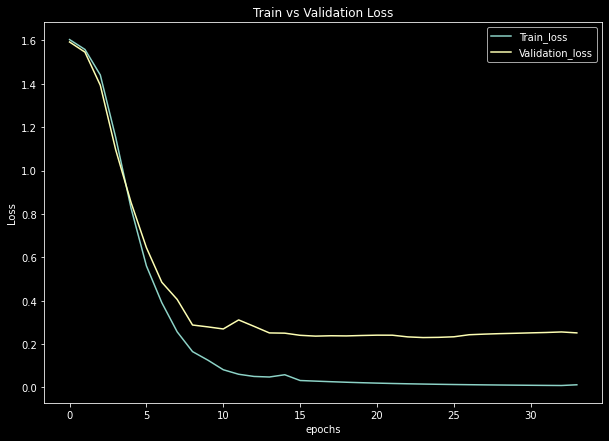

---
<font color=green>Q17:</font>
<br><font color='green'>
Plot the training and validation accuracy
</font>

---

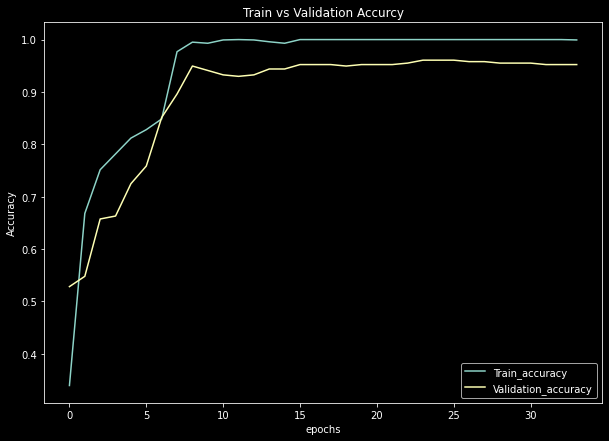

---
<font color=green>Q18:</font>
<br><font color='green'>
Plot the training and validation precision
</font>

---

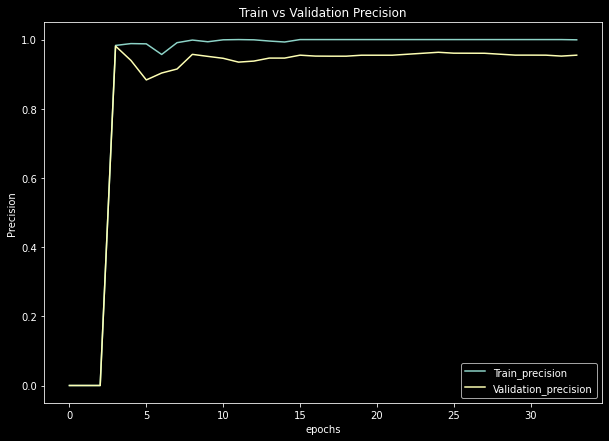

---
<font color=green>Q19:</font>
<br><font color='green'>
Plot the training and validation recall
</font>

---

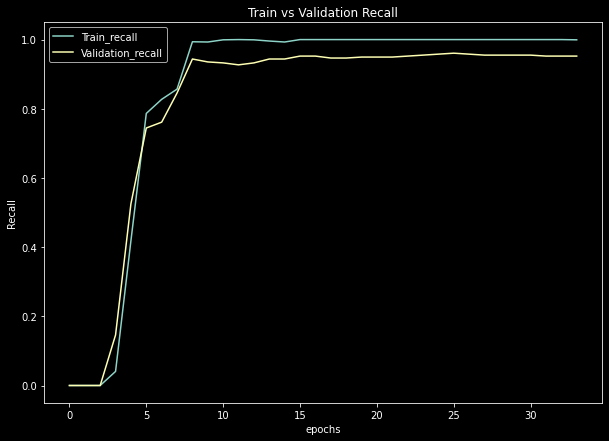

---
<font color=green>Q20:</font>
<br><font color='green'>
Plot the confusion matrix using the following function
</font>

---

In [ ]:
# Import Modules
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Functin to plot the confusion matrix
def plot_confusion_matrix(y_test, y_hat):
  fig = plt.figure(figsize=(10, 8))
  g = sns.heatmap(confusion_matrix(y_test, y_hat),
              annot=True,
              fmt="0.0f")
  g.set_xlabel("Predicted")
  g.set_ylabel("Actual")
  g.set_title("Confusion Matrix on the test set")
  plt.show()

14/14 [==============================] - 2s 77ms/step


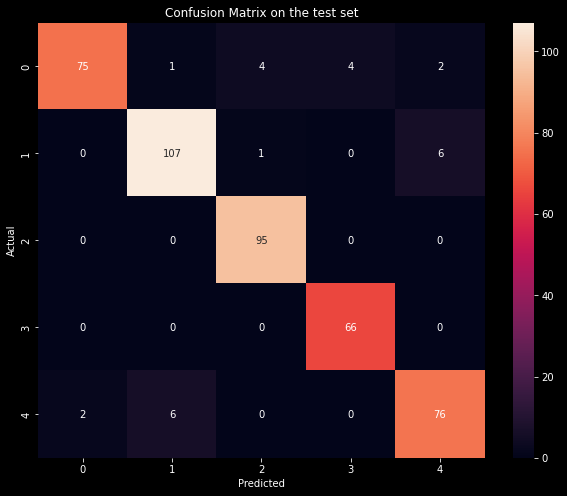

## 3.2 Training the embedding matrix

---
<font color=green>Q20:</font>
<br><font color='green'>
Create the following model
</font>

---

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1FXc2jWEuuodqtu68Qeac33_V6J-mE__n"></center>

Model: "sequential"
______________________________________________________________________________________________________________________________________________________
 Layer (type)                                                      Output Shape                                                Param #                
 embedding_1 (Embedding)                                           (None, 300, 200)                                            2000000                
                                                                                                                                                      
 bidirectional (Bidirectional)                                     (None, 64)                                                  59648                  
                                                                                                                                                      
 dense (Dense)                                                     (None, 

---
<font color=green>Q21:</font>
<br><font color='green'>
Fit your new model to the training data. Plot the tranining and validation loss,accuracy, precision and recall. Then, evaluate your model on the test data
</font>

---

Epoch 1/200
6/6 [==============================] - 19s 2s/step - loss: 1.6000 - accuracy: 0.3146 - precision: 0.9416 - recall: 0.2242 - val_loss: 1.5851 - val_accuracy: 0.4017 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 10s 2s/step - loss: 1.5506 - accuracy: 0.4789 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5503 - val_accuracy: 0.4270 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 10s 2s/step - loss: 1.4730 - accuracy: 0.4881 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4564 - val_accuracy: 0.4354 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 10s 2s/step - loss: 1.2816 - accuracy: 0.4838 - precision: 1.0000 - recall: 0.0688 - val_loss: 1.2399 - val_accuracy: 0.4326 - val_precision: 0.8068 - val_recall: 0.1994 - lr: 0.0010
Epoch 5/200
6/6 [=======

In [ ]:
# Evaluate the model


14/14 [==============================] - 1s 78ms/step - loss: 0.3543 - accuracy: 0.8764 - precision: 0.9260 - recall: 0.8719


[0.35427039861679077,
 0.8764045238494873,
 0.9260143041610718,
 0.8719100952148438]

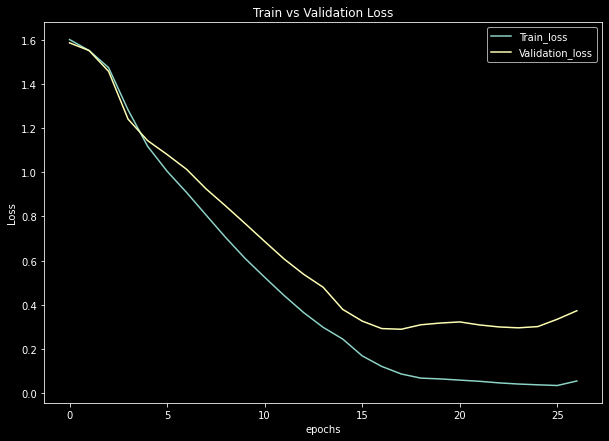

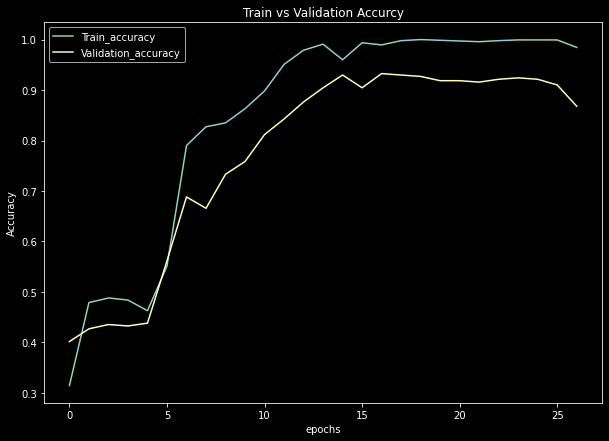

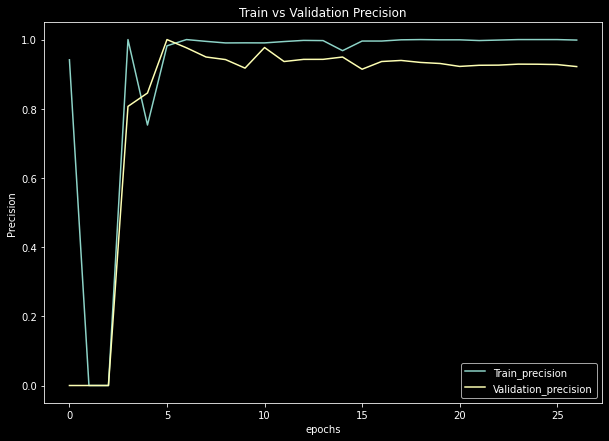

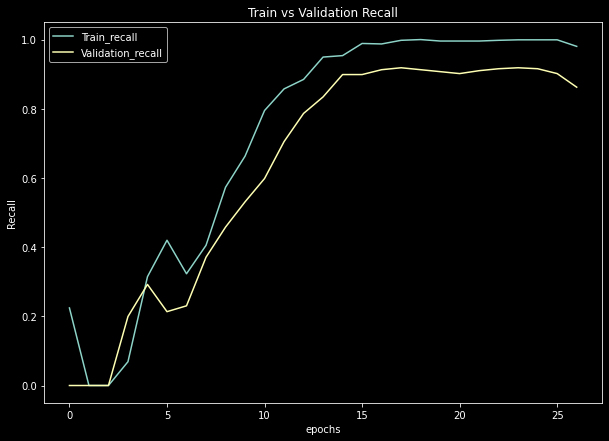

---
<font color=green>Q21:</font>
<br><font color='green'>
Plot the confusion matrix
</font>

---

14/14 [==============================] - 2s 79ms/step


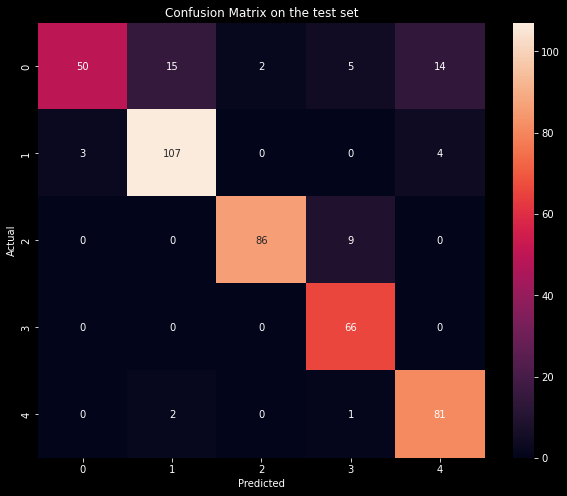

# Wrap-up

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1UZuzjojifkjy8BaLXejXYwGCjzL4DJua"></center>

## To go further...

As an exercise:

* Change the hyperparameters and add some regularization to have the same performance on the training dataset and the test dataset.

* Test different architectures on another dataset, stored in the folder "data": `news_headlines.csv`. This dataset contains the sentiments for financial news headlines from the perspective of a retail investor. Further details about the dataset can be found in: [Malo, P., Sinha, A., Takala, P., Korhonen, P. and Wallenius, J. (2014): “Good debt or bad debt: Detecting semantic orientations in economic texts.](https://arxiv.org/pdf/1307.5336.pdf)

## Contact

If you have any question regarding this notebook, please do not hesitate to contact: hachem.madmoun@enpc.fr

